In [1]:
import logging
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import pykeen
from pykeen.kge_models import TransE

In [2]:
%matplotlib inline

In [3]:
logging.basicConfig(level=logging.INFO)
logging.getLogger('pykeen').setLevel(logging.INFO)

In [4]:
print(sys.version)

3.7.3 (default, Mar 27 2019, 09:23:15) 
[Clang 10.0.1 (clang-1001.0.46.3)]


In [5]:
print(time.asctime())

Mon Oct 28 16:28:48 2019


In [6]:
print(pykeen.get_version())

0.0.27-dev


Check which hyper-parameters are required by TransE:

In [7]:
TransE.hyper_params

['embedding_dim',
 'margin_loss',
 'learning_rate',
 'scoring_function',
 'normalization_of_entities']

Define output directory:

In [8]:
output_directory = os.path.join(
    '../../iswc_demo/experiments',
    'compath'
)


Define hyper-parameters inclduing the evaluation information:
 * Define the hyper-parameter optimization mode: **HPO_mode**
 * Define for each hyper-parameter a list of values (single valued lists are possible)
 * Define the number of hyper-parameter optimization iterations: **maximum_number_of_hpo_iters**
 * Define the path to the test set (**test_set_path**) or define the ratio of the training set that should be used as test set (**test_set_ratio**)
 * Define whether you want to compute the metrics (mean rank and hits@k) in raw or in a filtered setting: **filter_negative_triples**

In [9]:
config = dict(
    training_set_path           = '../../iswc_demo/compath.keen.tsv',
    test_set_ratio              = 0.1, # 10% of training set will be used as a test set
    execution_mode              = 'HPO_mode', # Define hyper-parameter optimization mode
    random_seed                 = 0,
    kg_embedding_model_name     = 'TransE',
    embedding_dim               = [10,20,50,100],
    scoring_function            = [1,2],  
    normalization_of_entities   = [2],  # corresponds to L2
    margin_loss                 = [1,2,3,4,5,6,7,8,9,10],
    learning_rate               = [0.1,0.01,0.001],
    num_epochs                  = [50,100],  
    batch_size                  = [32],
    filter_negative_triples     = True,
    maximum_number_of_hpo_iters = 5, # Define the number HPO iterations
    preferred_device            = 'cpu'
)

Train and evaluate TransE:

In [10]:
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

Training epoch: 100%|██████████| 50/50 [00:04<00:00, 11.73it/s]
                                                               
Training epoch: 100%|██████████| 50/50 [00:05<00:00,  8.56it/s]
                                                               
Training epoch:  52%|█████▏    | 52/100 [00:04<00:04, 10.58it/s]


Training epoch: 100%|██████████| 100/100 [00:09<00:00, 11.15it/s]
                                                                 
Training epoch: 100%|██████████| 50/50 [00:07<00:00,  6.53it/s]
                                                               
Training epoch:  29%|██▉       | 29/100 [00:04<00:10,  6.63it/s]


Training epoch: 100%|██████████| 100/100 [00:15<00:00,  6.86it/s]
                                                                 
HPO Iteration: 100%|██████████| 5/5 [00:44<00:00,  9.55s/it]


Check result entries:

In [11]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'entity_to_embedding', 'relation_to_embedding', 'eval_summary', 'entity_to_id', 'relation_to_id', 'final_configuration'])

Get the model configuration that lead to best results:

In [12]:
results.results['final_configuration']

{'training_set_path': '../../iswc_demo/compath.keen.tsv',
 'test_set_ratio': 0.1,
 'execution_mode': 'HPO_mode',
 'random_seed': 0,
 'kg_embedding_model_name': 'TransE',
 'embedding_dim': 20,
 'scoring_function': 1,
 'normalization_of_entities': 2,
 'margin_loss': 10,
 'learning_rate': 0.1,
 'num_epochs': 100,
 'batch_size': 32,
 'filter_negative_triples': True,
 'maximum_number_of_hpo_iters': 5,
 'preferred_device': 'cpu',
 'pykeen-version': '0.0.27-dev',
 'num_entities': 1125,
 'num_relations': 2}

Access trained model:

In [13]:
results.results['trained_model']

TransE(
  (criterion): MarginRankingLoss()
  (entity_embeddings): Embedding(1125, 20)
  (relation_embeddings): Embedding(2, 20)
)

Visualize loss values:

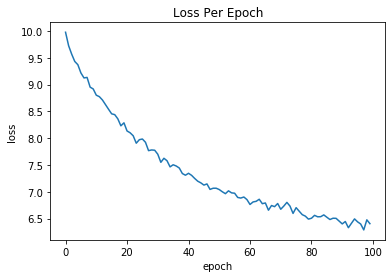

In [14]:
losses = results.results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

Get evaluation results:
 * Mean rank
 * Hits@k, k $\in$ {1,3,5,10} 

In [15]:
results.results['eval_summary']

{'mean_rank': 268.8820224719101,
 'hits@k': {1: 0.028089887640449437,
  3: 0.25,
  5: 0.28651685393258425,
  10: 0.36235955056179775}}